In [1]:
import pandas as pd
viajes = pd.read_csv('2019-04.csv')
print(viajes.head( 3))
print(viajes.tail( 3)) # todos dentro de abril 

  Genero_Usuario  Edad_Usuario  Bici  Ciclo_Estacion_Retiro Fecha_Retiro  \
0              M            28  2388                    378   01/04/2019   
1              M            27  8272                    309   01/04/2019   
2              M            23  4058                    277   01/04/2019   

  Hora_Retiro  Ciclo_Estacion_Arribo Fecha_Arribo Hora_Arribo  
0    00:00:06                    323   01/04/2019    00:09:01  
1    00:00:09                    288   01/04/2019    00:03:13  
2    00:00:31                    321   01/04/2019    00:09:42  
       Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro  \
690000              F            31   9417                    332   
690001              M            34  12204                    329   
690002              M            27  12043                     32   

       Fecha_Retiro Hora_Retiro  Ciclo_Estacion_Arribo Fecha_Arribo  \
690000   29/04/2019    23:56:47                    384   30/04/2019   
690001   29/04/2019 

In [2]:
 # solo nos interesan las estaciones de arribo 
viajes  = viajes.drop(['Genero_Usuario', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Fecha_Retiro' , 'Hora_Retiro', 'Fecha_Arribo'],
                       axis=1)
viajes.dtypes

Ciclo_Estacion_Arribo     int64
Hora_Arribo              object
dtype: object

In [3]:
viajes['Hora_Arribo'] =  pd.to_datetime(viajes['Hora_Arribo'], format='%H:%M:%S')

In [4]:
type(viajes.Hora_Arribo[0]) # ya tenemos los tiempos 

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# un bonito histograma 
viajes['Hora'] = viajes.Hora_Arribo.dt.hour
viajes['Hora_Arribo'] = 1 # bandera

In [6]:
# seleccion de quienes llegaron en [12,13] 
index = (viajes.Hora == 13) | (viajes.Hora == 12)
viajes  = viajes.loc[ index, :]
viajes = viajes.reset_index(drop=True)
viajes.head()

,Ciclo_Estacion_Arribo,Hora_Arribo,Hora
0,113,1,13
1,468,1,12
2,142,1,13
3,52,1,12
4,142,1,13


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000214EB949588>]],
      dtype=object)

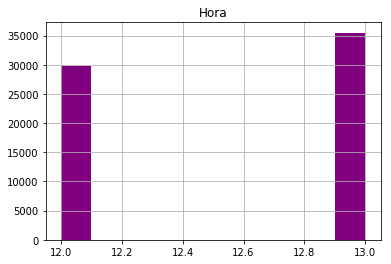

In [7]:
%matplotlib inline
viajes[['Hora']].hist( color='purple')

In [8]:
mapa = viajes.groupby(['Ciclo_Estacion_Arribo', 'Hora']).count().reset_index().sort_values(['Hora_Arribo'],
                                                                                           ascending=False).head(5)
mapa = mapa.rename(columns={ 'Hora_Arribo': 'ViajesMesAbril12_13'})
mapa

,Ciclo_Estacion_Arribo,Hora,ViajesMesAbril12_13
53,27,13,347
84,43,12,342
1,1,13,326
85,43,13,317
52,27,12,259


In [9]:
coordenadas = pd.read_csv('https://raw.githubusercontent.com/leonpalafox/dsclase_2019_1/master/ecobicis/data/estaciones.csv')
coordenadas = coordenadas[['id', 'name', 'lat', 'lon']]
coordenadas.head(5)

,id,name,lat,lon
0,443,443 BRUNO TRAVEN-GOLONDRINAS,19.359655,-99.162025
1,416,416 RECREO-PARROQUÍA,19.371308,-99.177607
2,437,437 MORAS-COMUNAL,19.364808,-99.176022
3,438,438 ADOLFO PRIETO-JOSÉ MARÍA OLLOQUI,19.364797,-99.174583
4,440,440 REAL DE MAYORAZGO-PUENTE XOCO,19.360650,-99.168669


In [10]:
mapa_top5 = mapa.merge( coordenadas, how='left', left_on='Ciclo_Estacion_Arribo', right_on='id')
mapa_top5

,Ciclo_Estacion_Arribo,Hora,ViajesMesAbril12_13,id,name,lat,lon
0,27,13,347,27,27 REFORMA-HAVRE,19.429115,-99.162614
1,43,12,342,43,43 JUAREZ-REVILLAGIGEDO,19.435228,-99.146063
2,1,13,326,1,1 RIO BALSAS-RIO SENA,19.433296,-99.168051
3,43,13,317,43,43 JUAREZ-REVILLAGIGEDO,19.435228,-99.146063
4,27,12,259,27,27 REFORMA-HAVRE,19.429115,-99.162614


In [11]:
import folium
from folium import plugins
import numpy as np
m = folium.Map(location = [19.4277428,-99.1756721], zoom_start=14)
marker_cluster_ = folium.plugins.MarkerCluster()
for idx in range(0,len(mapa_top5) ):
    marker_ = folium.Marker( location = mapa_top5[  ['lat', 'lon'] ].iloc[idx], 
                            popup = str(mapa_top5['name'][ idx ]) + ': Viejes en abril ' + 
                            str( mapa_top5.Ciclo_Estacion_Arribo[idx])  ,  
                           icon = folium.Icon(color='lightgreen') )
    marker_cluster_.add_child(marker_)
m.add_child(marker_cluster_)